# Задание 7.1

1) Примените функцию pairs () для построения матрицы диаграмм
рассеяния по первым десяти числовым столбцам. Примените функцию
plot() для 5 пар столбцов.

In [ ]:
# Загружаем датасет

college <- read.csv("College.csv")
head(college)

,X,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
2,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
3,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
4,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
5,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
6,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


Удаление столбцов с текстом

In [ ]:
College <- college[3:19]
head(College)

Функция pairs() используется для построения матрицы диаграмм рассеяния, которая позволяет визуализировать зависимость между всеми парами переменных в данных. По умолчанию функция pairs() строит матрицу диаграмм рассеяния для всех переменных в данных, но можно выбрать только некоторые переменные, используя параметр select.

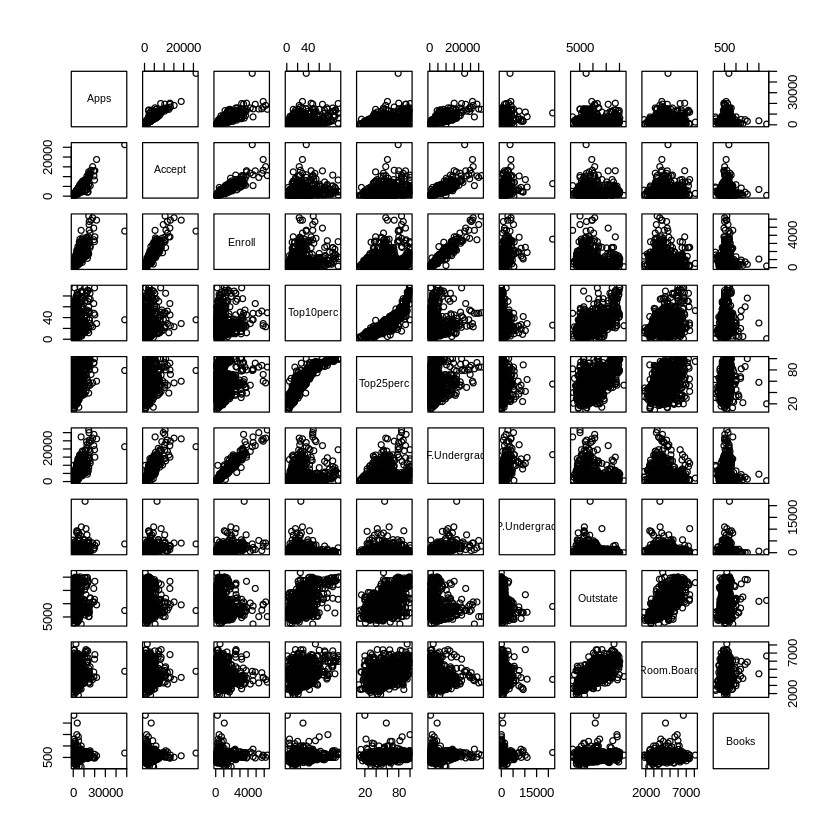

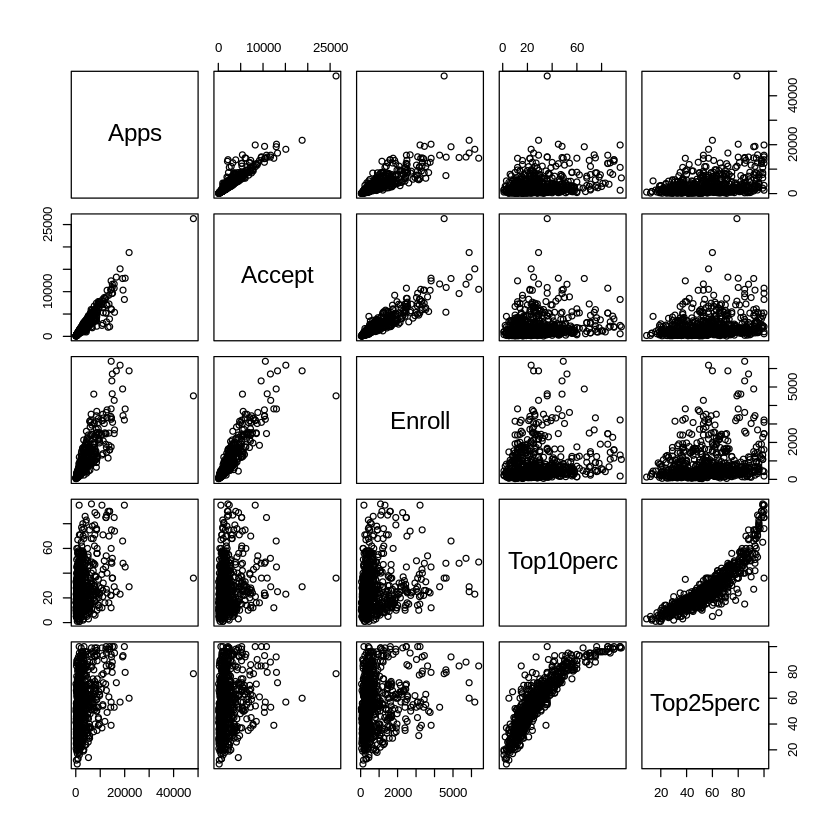

In [ ]:
# Выбор первых десяти столбцов
data <- College[, 1:10]

# Построение матрицы диаграмм рассеяния
pairs(data)

# Построение 5 пар столбцов
pairs(data[, 1:5])







































Из графиков 5 пар столбцов можно сделать вывод о том, какие переменные имеют наибольшую взаимосвязь друг с другом и какие переменные имеют наибольшее значение в каждой из пар столбцов.

В данном случае Enroll Top10perc, так диаграмма рассеивания больше других похожа на колокол

#7.2 Построение столбчатых, круговых диаграмм, гистограмм и функций плотности

1) Воспользуйтесь функцией hist() и для 4 количественных переменных
набора College() постройте гистограммы с разным числом классов.
Полезной для вас может оказаться команда
par (mf row = с (2, 2))
она разделит окно графического устройства на четыре области, что
сделает возможным построение четырех графиков одновременно.
Изменение аргументов этой функции приведет к разделению экрана
иным образом.

2) Постройте функцию плотности распределения для колонки Enroll.
Разбейте университеты на классы по значению Enroll. Сделайте
круговую диаграмму для этих классов



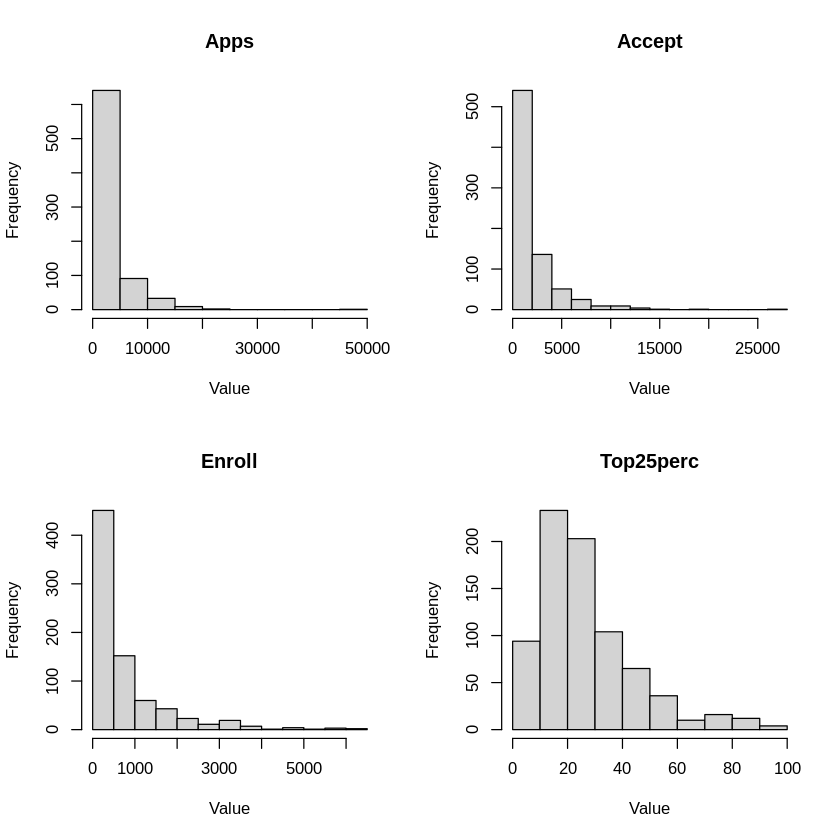

In [ ]:
# Выбор количественных переменных
vars <- c("Apps", "Accept", "Enroll", "Top25perc")

# Построение гистограмм
par(mfrow = c(2, 2))
for (i in 1:4) {
  hist(College[, i], main = vars[i], xlab = "Value", ylab = "Frequency")
}


На гистограммах показано количество значений в том или ином диапазоне (ось Х) по каждому столбцу.


Плотность распределения - это мера, которая показывает, как распределены значения в некотором наборе данных. Чем выше плотность распределения, тем больше значений в наборе данных распределены равномерно вокруг центра распределения.

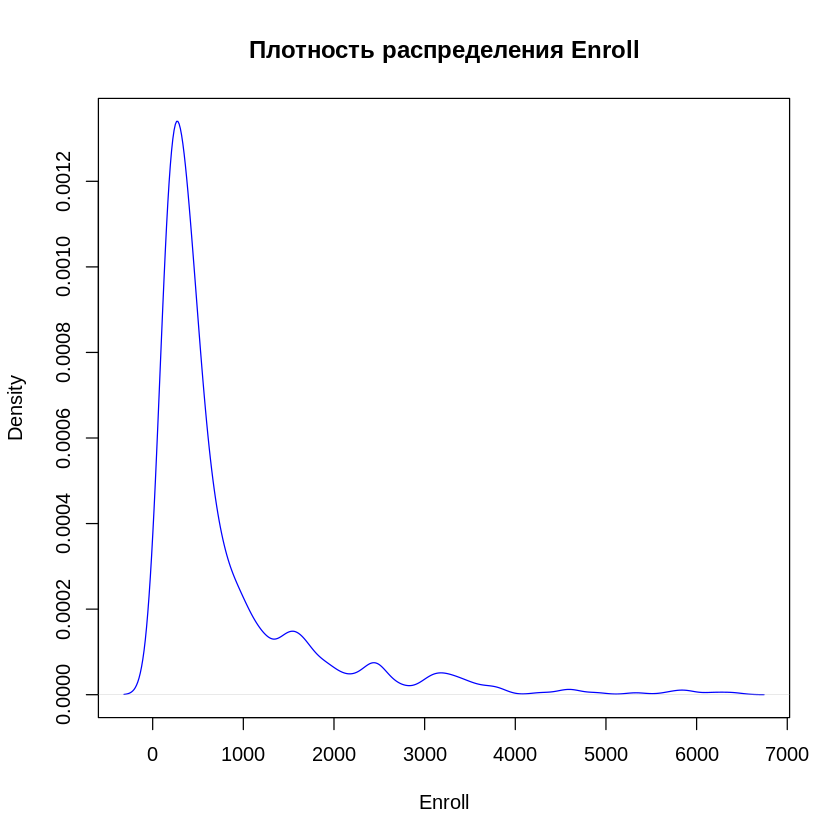

In [ ]:
# Оцениваем плотность распределения для колонки Enroll
density_enroll <- density(College$Enroll)

# Строим график функции плотности распределения для колонки Enroll
plot(density_enroll, main = "Плотность распределения Enroll", xlab = "Enroll", col = "blue")


По графику видно, подавляющее количество значений меньше 100 по столбцу Enroll

Разбиение университетов на классы по значению Enroll. Круговая диаграмму для этих классов.

Столбец был разделен на квантили-метки, а потом к каждому значению столбца Enroll была добавлена метка и на основе этих меток была создана диаграмма

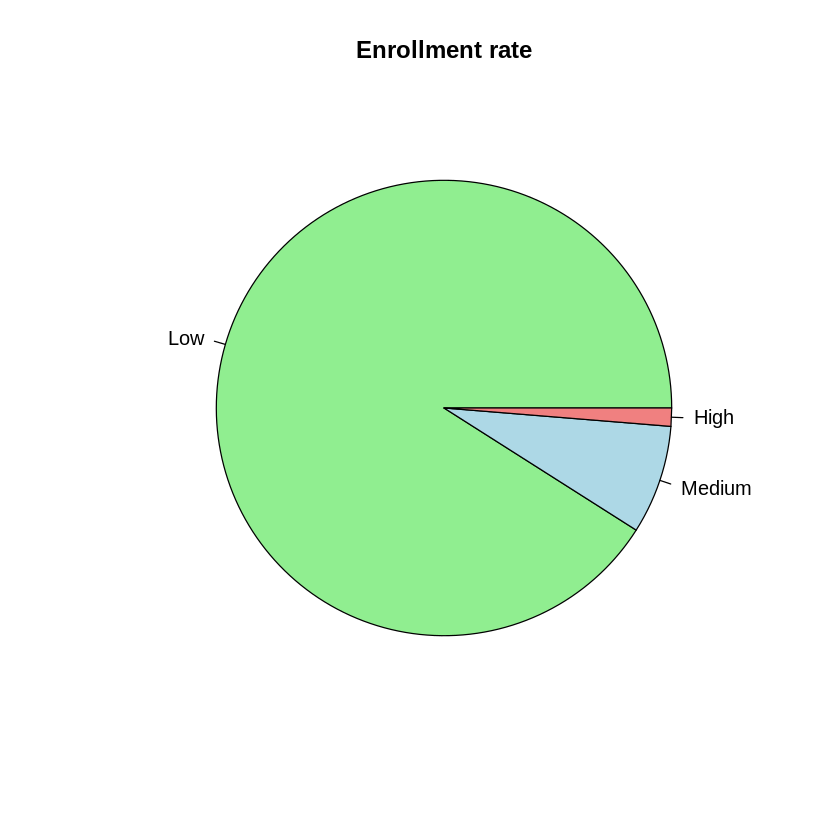

In [ ]:
# Получаем пороговые значения для каждой трети по плотности
thresholds <- quantile(density_enroll$x, probs = c(1/3, 2/3))

# Создаем новую переменную, которая является индикатором, к какому классу принадлежит университет
College$EnrollClass <- cut(College$Enroll, breaks = c(-Inf, thresholds, Inf), labels = c("Low", "Medium", "High"))

# Строим круговую диаграмму
pie(table(College$EnrollClass), main = "Enrollment rate", col = c("lightgreen", "lightblue", "lightcoral"))

#Итог - распределение значений на гистограмме плотности распределения и на круговой диаграмме совпадают по количеству зачисленных студентов.